### Comparsion over supervisied learning algorithm  





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('diabetes.csv')

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
numerical_column_names=df.select_dtypes(include=['number']).columns
print("Numerical column Names:",numerical_column_names)

Numerical column Names: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
df[df['Pregnancies']==0].shape

(111, 9)

In [ ]:
df[df['Glucose']==0].shape

(5, 9)

In [ ]:
df[df['BloodPressure']==0].shape

(35, 9)

In [ ]:
df[df['SkinThickness']==0].shape

(227, 9)

In [ ]:
df[df['Insulin']==0].shape

(374, 9)

In [ ]:
df[df['BMI']==0].shape

(11, 9)

In [ ]:
df[df['DiabetesPedigreeFunction']==0].shape

(0, 9)

In [ ]:
data = df.loc[(df[['Glucose', 'BloodPressure', 'BMI']] != 0).all(axis=1)]
data.loc[df['SkinThickness']!=0,'SkinThickness']=df['SkinThickness'].mean()
data.loc[df['Insulin']!=0,'InsulinKnown']=1
data.loc[df['Insulin'] == 0, 'InsulinKnown'] = 0

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'InsulinKnown'],
      dtype='object')

In [ ]:
data=data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
import plotly.express as px

data_outcomes=data['Outcome'].value_counts().reset_index()
data_outcomes.columns=['Outcome','Count']

fig = px.pie(
    data_outcomes,
    values='Count',
    names='Outcome',
    title='Outcome',
    color='Outcome',
    color_discrete_map={'No': 'Blue', 'Yes': 'red'}
)

fig.update_layout(height=400,width=400)
fig.show()

In [ ]:
import plotly.express as px


fig = px.bar(
    data_outcomes,
    x='Outcome',
    y='Count',
    color='Outcome',
    title='Outcome Distribution',
    color_discrete_map={'No': 'blue', 'Yes': 'red'}
)

fig.update_layout(height=400, width=500)
fig.show()


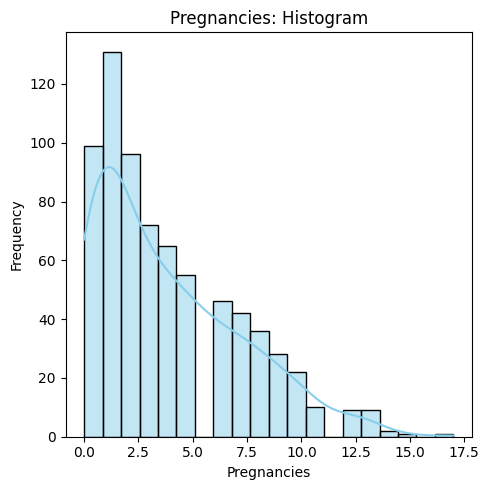

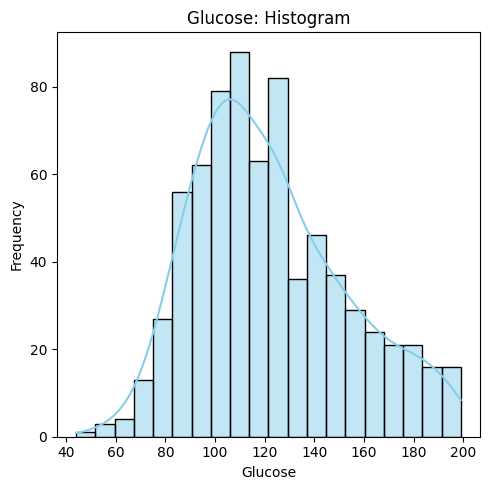

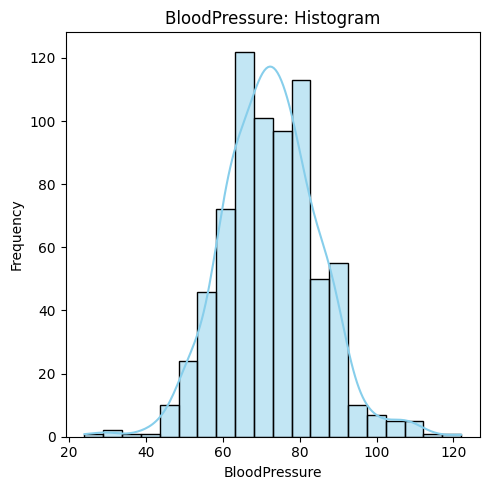

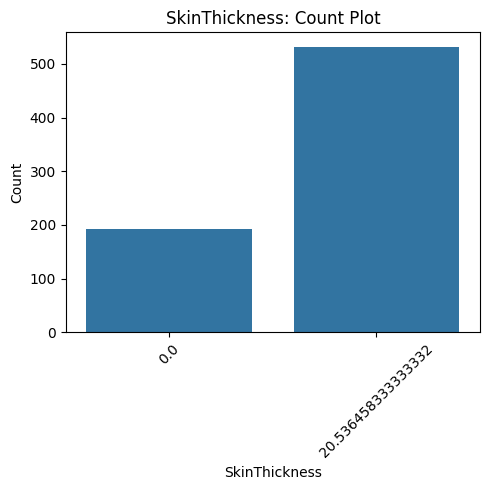

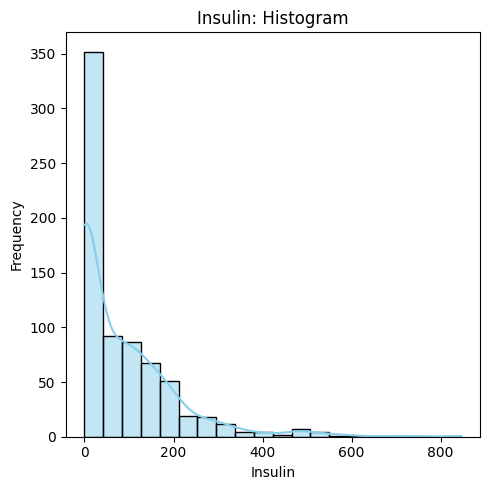

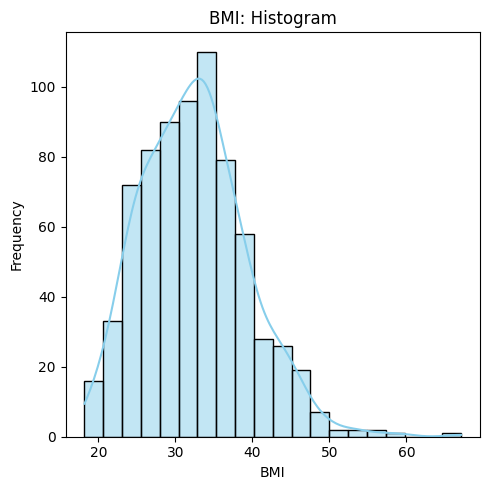

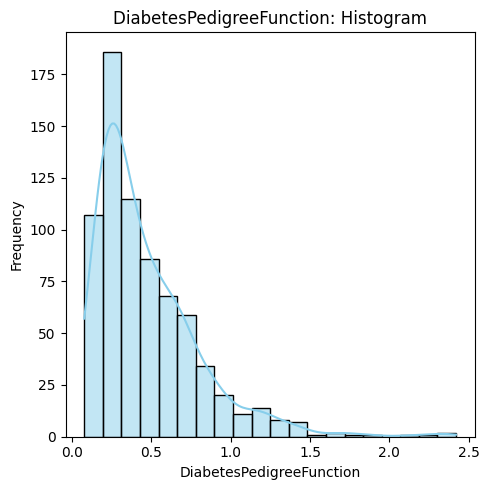

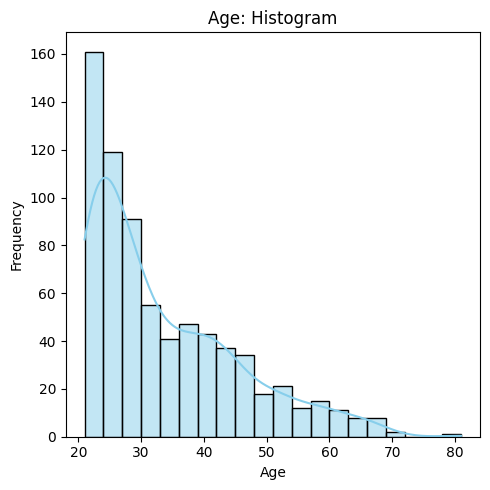

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for column in data.columns:
    if column == 'Outcome':
        continue  # Skip the target column

    plt.figure(figsize=(5, 5))

    # If categorical or has very few unique values
    if data[column].dtype == 'object' or data[column].nunique() < 10:
        sns.countplot(x=data[column])
        plt.title(f'{column}: Count Plot')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)

    # For numerical/continuous data
    else:
        sns.histplot(x=data[column], kde=True, color='skyblue', bins=20)
        plt.title(f'{column}: Histogram')
        plt.xlabel(column)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

<Axes: >

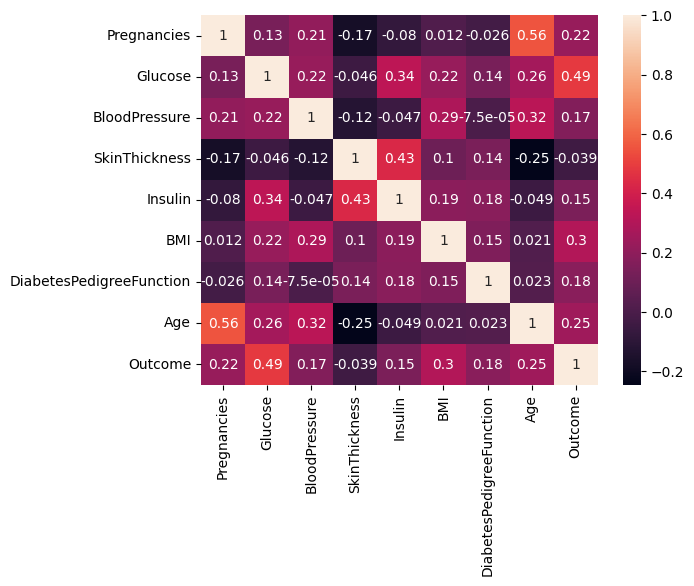

In [ ]:
cor_mat=data.corr()
sns.heatmap(cor_mat,annot=True)

In [ ]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']

In [ ]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

linear Regression


In [ ]:
log_model = LogisticRegression()
log_model.fit(x_train, y_train)
log_pred = log_model.predict(x_test)


K-Nearest Neighbors


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB()
}

In [ ]:
model_names=[]
accuracies=[]

for name, clf in models.items():
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  print(f'{name} accuracy : {accuracy}')
  model_names.append(name)
  accuracies.append(accuracy)

df_models=pd.DataFrame({'Model':model_names,'Accuracy':accuracies})
df_models.sort_values(by='Accuracy',ascending=False)

Logistic Regression accuracy : 0.8
Decision Tree accuracy : 0.7724137931034483
Random Forest accuracy : 0.8068965517241379
K-Nearest Neighbors accuracy : 0.7172413793103448
Support Vector Machine accuracy : 0.7655172413793103
Naive Bayes accuracy : 0.7724137931034483


,Model,Accuracy
2,Random Forest,0.806897
0,Logistic Regression,0.800000
1,Decision Tree,0.772414
5,Naive Bayes,0.772414
4,Support Vector Machine,0.765517
3,K-Nearest Neighbors,0.717241


In [ ]:
df_models=pd.DataFrame({'Model':model_names,'Accuracy':accuracies})
fig=px.line(df_models,x='Model',y='Accuracy',title='Model Accuracy',markers=True,
             )
fig.update_layout(
    xaxis_title='Model_name',
    yaxis_title='Accuracy',
    height=400,
    width=600
)
fig.show()
